# To implement the Z-score normalization per column and per row

## Content: 
### Preface
### A. Apply the Z-score normalization for each column 
### B. Apply the Z-score normalization for each row 

## Preface

## 1. Import necessary libraries:

In [163]:
import os # for the directory 
import csv # reading files
import pandas as pd  # data analysis tools
import numpy as np
from pandas import DataFrame # easier to analysis
fname=r"C:\Users\mohab\gdc_download_PhiSci" # locate the location 
os.chdir(r"C:\Users\mohab\gdc_download_PhiSci") # assign the default work folder 
list_names = os.listdir(fname) # to include all files into one list variable
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 2. Import the transfered file produced earlier using log2 transformations:

In [164]:
# the first file we need to select genes from
finalTable = pd.read_csv('Final_table_filtered_log2.csv')
finalTableCol = finalTable
finalTableRow = finalTable

## 3. Explore Dataframe file

In [165]:
print(type(finalTableCol))

<class 'pandas.core.frame.DataFrame'>


In [166]:
finalTable.head()

,gene_type,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,...,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A
0,ENSG00000146083,3.543735,3.782086,4.328759,3.605053,3.437901,3.246825,3.940918,3.543197,2.507047,...,4.138276,4.673481,3.165461,4.058607,3.247750,2.596255,3.844268,3.812442,3.735838,3.854496
1,ENSG00000198242,6.368363,7.174750,7.218648,7.866595,6.671065,6.945990,7.349553,7.829378,7.805768,...,7.124788,5.890065,8.189065,7.153828,6.532103,7.247086,7.050122,7.468093,7.378624,7.252382
2,ENSG00000134108,4.903439,4.884338,4.210988,4.946717,4.844588,4.920252,5.130648,5.098081,5.337490,...,4.765736,4.598056,5.388719,4.163245,5.227229,5.146279,4.513179,4.553953,4.592771,4.294558
3,ENSG00000167700,3.001646,3.355721,3.769917,2.102722,2.919729,2.673633,4.159291,2.709730,3.539365,...,3.223776,4.071599,5.467047,5.919848,1.922550,2.839571,4.100222,3.603895,3.988583,3.238713
4,ENSG00000070087,3.647191,5.180407,4.482864,4.340716,2.811206,4.512978,4.165777,2.901687,6.272282,...,5.718423,6.065259,5.236752,5.192217,3.024077,3.085104,4.555434,5.040200,5.927796,2.802749


In [167]:
finalTableCol.shape

(5430, 594)

## A. Apply the Z-score normalization for each column 

### A.1 Select all columns from the original Dataframe

In [168]:
# extract all columns 
cols = list(finalTableCol.columns)
# exclude the gene_type column
cols.remove('gene_type')
# print the result table
finalTableCol[cols].head()

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,...,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A
0,3.543735,3.782086,4.328759,3.605053,3.437901,3.246825,3.940918,3.543197,2.507047,4.430318,...,4.138276,4.673481,3.165461,4.058607,3.247750,2.596255,3.844268,3.812442,3.735838,3.854496
1,6.368363,7.174750,7.218648,7.866595,6.671065,6.945990,7.349553,7.829378,7.805768,7.166924,...,7.124788,5.890065,8.189065,7.153828,6.532103,7.247086,7.050122,7.468093,7.378624,7.252382
2,4.903439,4.884338,4.210988,4.946717,4.844588,4.920252,5.130648,5.098081,5.337490,5.152576,...,4.765736,4.598056,5.388719,4.163245,5.227229,5.146279,4.513179,4.553953,4.592771,4.294558
3,3.001646,3.355721,3.769917,2.102722,2.919729,2.673633,4.159291,2.709730,3.539365,3.780040,...,3.223776,4.071599,5.467047,5.919848,1.922550,2.839571,4.100222,3.603895,3.988583,3.238713
4,3.647191,5.180407,4.482864,4.340716,2.811206,4.512978,4.165777,2.901687,6.272282,2.542628,...,5.718423,6.065259,5.236752,5.192217,3.024077,3.085104,4.555434,5.040200,5.927796,2.802749


### A.2. To apply Z-score for each column

In [169]:
# now iterate over the remaining columns and create a zscore values
for col in cols:
    finalTableCol[col] = (finalTableCol[col] - finalTableCol[col].mean())/finalTableCol[col].std(ddof=0)

### A.3. Calculate the Kmeans for Column Z-score values

In [170]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(finalTableCol[cols].values)
y_kmeans = kmeans.predict(finalTableCol[cols].values)
y_kmeans

array([0, 1, 2, ..., 2, 0, 2])

### A.4. Choosing the Appropriate Number of Clusters

In [171]:
# assign proper parameters
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the Sum Sequared Distance (SSD) values for each k
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(finalTableCol[cols].values)
    ssd.append(kmeans.inertia_)

### A.5. Plotting the best K using elbow figure

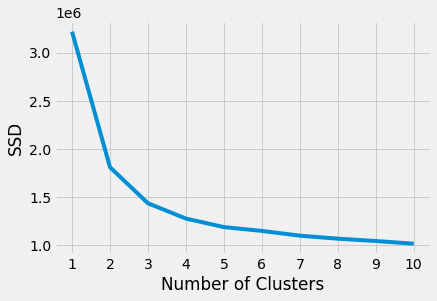

In [172]:
# plot the SSD values obtained by Kmeans for all data point
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), ssd)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

### A.6. Save the file to .CSV format

In [173]:
#to convert the output Data Frame Table to a correponding CSV format
finalTableCol.to_csv(r'Final_table_Z_scored_col.csv', index = False)

## B. Row Scale using Z-Score Normalization

### B.1. Transpose the table to work on rows 

In [174]:
# transpose the imported finalTableRow
#finalTableRow = finalTableRow.T
#finalTableRow.head()
# to exclude the 'gene_type' from the original Dataframe table
finalTableRow = finalTableRow.set_index('gene_type').T
finalTableRow.head()

gene_type,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,ENSG00000179833,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
TCGA-J2-8192-01A,-0.632987,1.528208,0.407357,-1.047754,-0.553830,0.388746,0.898745,0.287011,-0.947866,-0.319389,...,-0.326066,1.028538,0.507234,-0.063873,0.776673,-0.690489,2.761591,-0.586569,-0.708695,-0.462018
TCGA-75-5122-01A,-0.322922,1.863378,0.387391,-0.597680,0.578183,0.590022,0.880649,1.155917,-0.829487,-0.792725,...,-0.540278,1.431887,0.378882,0.100756,0.802032,-0.826721,2.813919,0.354595,-0.630747,0.024170
TCGA-91-A4BC-01A,-0.022100,1.889892,-0.100019,-0.391839,0.079858,0.650620,1.003629,1.073429,-0.514539,-1.357209,...,-0.572979,0.217213,-0.012699,-0.014164,0.481737,-0.255557,3.702859,-0.593484,-0.517506,0.052138
TCGA-49-6745-01A,-0.541925,2.554630,0.432966,-1.633560,-0.007371,0.634891,0.816693,0.121535,-1.098857,-0.064264,...,-1.286095,0.898092,1.023261,-0.485581,0.445753,-0.639752,2.565930,0.273899,-0.574706,0.059892
TCGA-44-2665-11A,-0.482557,1.686637,0.461217,-0.830209,-0.903019,0.659699,0.566711,0.612391,-0.979729,-0.875008,...,-0.531144,0.925127,0.423362,0.012123,0.335499,-0.450785,2.170040,0.152570,-0.518067,-0.179707


In [175]:
rows = list(finalTableRow.columns)
#rows.remove('gene_type')
#print(rows)
finalTableRow[rows].head()

gene_type,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,ENSG00000179833,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
TCGA-J2-8192-01A,-0.632987,1.528208,0.407357,-1.047754,-0.553830,0.388746,0.898745,0.287011,-0.947866,-0.319389,...,-0.326066,1.028538,0.507234,-0.063873,0.776673,-0.690489,2.761591,-0.586569,-0.708695,-0.462018
TCGA-75-5122-01A,-0.322922,1.863378,0.387391,-0.597680,0.578183,0.590022,0.880649,1.155917,-0.829487,-0.792725,...,-0.540278,1.431887,0.378882,0.100756,0.802032,-0.826721,2.813919,0.354595,-0.630747,0.024170
TCGA-91-A4BC-01A,-0.022100,1.889892,-0.100019,-0.391839,0.079858,0.650620,1.003629,1.073429,-0.514539,-1.357209,...,-0.572979,0.217213,-0.012699,-0.014164,0.481737,-0.255557,3.702859,-0.593484,-0.517506,0.052138
TCGA-49-6745-01A,-0.541925,2.554630,0.432966,-1.633560,-0.007371,0.634891,0.816693,0.121535,-1.098857,-0.064264,...,-1.286095,0.898092,1.023261,-0.485581,0.445753,-0.639752,2.565930,0.273899,-0.574706,0.059892
TCGA-44-2665-11A,-0.482557,1.686637,0.461217,-0.830209,-0.903019,0.659699,0.566711,0.612391,-0.979729,-0.875008,...,-0.531144,0.925127,0.423362,0.012123,0.335499,-0.450785,2.170040,0.152570,-0.518067,-0.179707


### B.2. To apply Z-score for each transposed row

In [176]:
for row in rows:
    finalTableRow[row] = (finalTableRow[row] - finalTableRow[row].mean())/finalTableRow[row].std(ddof=0)

In [177]:
finalTableRow.head()

gene_type,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000008517,ENSG00000070081,ENSG00000179833,...,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
TCGA-J2-8192-01A,-0.568761,-1.070652,-0.000209,-0.632171,-0.574220,-0.605328,0.329137,0.245862,-0.648731,1.273386,...,0.664966,0.913596,0.253424,0.304465,1.096347,-0.096078,0.413155,-1.636936,-0.865418,-0.707259
TCGA-75-5122-01A,0.347796,-0.112235,-0.066612,0.135094,0.694573,0.143373,0.285649,1.527693,-0.368996,-0.007123,...,0.110362,1.719899,0.047876,0.724598,1.181421,-0.472159,0.490767,1.223121,-0.482075,0.783945
TCGA-91-A4BC-01A,1.237028,-0.036417,-1.687601,0.486004,0.136036,0.368781,0.581189,1.406005,0.375244,-1.534210,...,0.025699,-0.708260,-0.579221,0.431322,0.106887,1.104589,1.809240,-1.657951,0.074829,0.869725
TCGA-49-6745-01A,-0.299578,1.864399,0.084959,-1.630829,0.038267,0.310276,0.131954,0.001749,-1.005530,1.963573,...,-1.820587,0.652831,1.079814,-0.771728,-0.013832,0.043986,0.122951,0.977896,-0.206475,0.893509
TCGA-44-2665-11A,-0.124086,-0.617624,0.178915,-0.261310,-0.965601,0.402554,-0.468792,0.725871,-0.724025,-0.229722,...,0.134010,0.706875,0.119108,0.498407,-0.383715,0.565645,-0.464232,0.609198,0.072073,0.158626


### B.3. Calculate the Kmeans for Column Z-score values

In [178]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(finalTableRow[rows].values)
y_kmeans = kmeans.predict(finalTableRow[rows].values)
y_kmeans

array([3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 1, 3, 3, 0, 3, 0, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 0, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2,
       3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2,
       3, 3, 3, 2, 3, 1, 2, 3, 1, 0, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1,
       3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 2, 2,
       3, 0, 2, 3, 3, 3, 2, 2, 3, 0, 3, 2, 3, 3, 2, 2, 3, 3, 1, 2, 3, 1,
       1, 1, 1, 0, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 0, 1, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 1, 3, 3, 2, 2, 3, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 0, 1, 3, 2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 2, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 0, 1, 3, 2, 3, 1, 3, 3, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 3, 2, 3, 2, 3, 1, 0,
       3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 3, 2, 3,

### B.4. Choosing the Appropriate Number of Clusters

In [183]:
# assign proper parameters
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the Sum Sequared Distance (SSD) values for each k
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(finalTableRow[rows].values)
    ssd.append(kmeans.inertia_)

### B.5. Plotting the best K using elbow figure

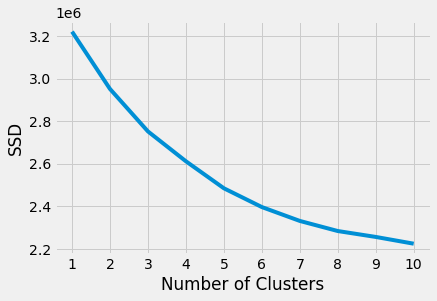

In [184]:
# plot the SSD values obtained by Kmeans for all data point
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), ssd)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

### B.6. Save the file to .CSV format

In [185]:
#to convert the output Data Frame Table to a correponding CSV format
finalTableRow.to_csv(r'Final_table_Z_scored_row.csv', index = True)